![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime.

## The Scenario

We've been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## Research questions for this project

+ Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.
+ Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.
+ Identify the number of crimes committed against victims of different age groups which will be saved as a pandas Series called `victim_ages`, with age group labels:  
  `"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("./data/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
print(crimes.shape)
crimes.head()

(185715, 12)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`

The `TIME OCC` column was read in as a string. We'll create a new feature called `HourOcc` which is the first 2 characters of the `TIME OCC` string converted to an int.

HourOcc
12    13663
18    10125
17     9964
20     9579
15     9393
Name: count, dtype: int64


<Axes: xlabel='HourOcc', ylabel='count'>

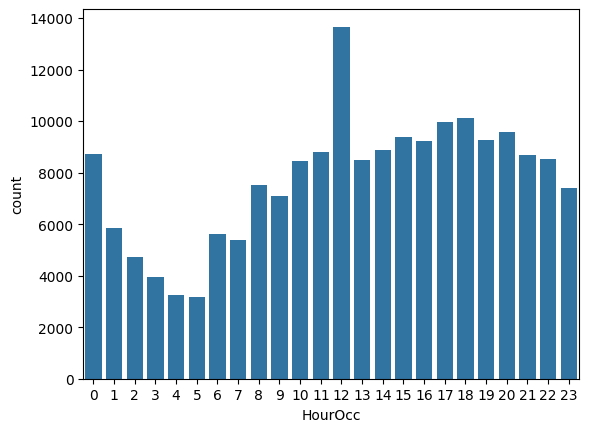

In [2]:
crimes["HourOcc"] = crimes["TIME OCC"].str[:2].astype(int)
hour_counts = crimes["HourOcc"].value_counts()
print(hour_counts[:5])
sns.countplot(data=crimes, x="HourOcc")

In [3]:
peak_crime_hour = hour_counts.index[0]
print(peak_crime_hour)

12


## Which area has the largest frequency of night crimes?

*Night crimes* are crimes committed between 10pm and 3:59am. This area will be saved as a string variable called `peak_night_crime_location`.

Start by engineering another new feature we'll call `NightOcc`. This will be a binary variable which we'll use a filter to find the most frequent area. Before we do this, we'll create a new column called `TimeOccInt` which is the `TIME OCC` column converted to an integer.

In [4]:
crimes["TimeOccInt"] = crimes["TIME OCC"].astype(int)
conditions = [crimes["TimeOccInt"].ge(2200), crimes["TimeOccInt"].le(359)]
choices = [True, True]
crimes["NightOcc"] = np.select(conditions, choices, default=False)
df_night_crimes = crimes[crimes["NightOcc"]]
df_night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HourOcc,TimeOccInt,NightOcc
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0,1,True
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1,155,True
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0,1,True
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23,2305,True
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0,1,True


In [8]:
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
HourOcc                  int32
TimeOccInt               int32
NightOcc                  bool
dtype: object

<class 'pandas.core.series.Series'>
AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Name: count, dtype: int64


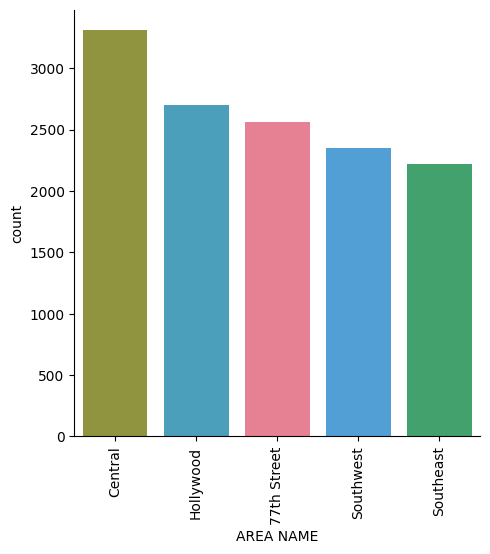

In [5]:
night_crime_area_counts = df_night_crimes["AREA NAME"].value_counts()
top_5_night_crime_areas = night_crime_area_counts[:5]
print(type(top_5_night_crime_areas))
print(top_5_night_crime_areas)
category_order = top_5_night_crime_areas.index
top_areas_plot = sns.catplot(x="AREA NAME", data=df_night_crimes, kind="count", order=category_order, hue="AREA NAME")
top_areas_plot.set_xticklabels(rotation=90)
plt.show()

In [6]:
peak_night_crime_location = top_5_night_crime_areas.index[0]
peak_night_crime_location

'Central'

## Identify the number of crimes committed against victims of different age groups

Results will be saved as a pandas Series called `victim_ages`, with age group labels:  
`"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

In [14]:
max_age = crimes["Vict Age"].max()
# print(max_age)  # 99
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, max_age]
crimes["VictAgeGroup"] = pd.cut(crimes["Vict Age"],
                                labels=labels,
                                bins=bins)
crimes.loc[:, ["Vict Age", "VictAgeGroup"]].head(20)

,Vict Age,VictAgeGroup
0,27,26-34
1,60,55-64
2,28,26-34
3,37,35-44
4,79,65+
5,28,26-34
6,33,26-34
7,35,35-44
8,72,65+
9,21,18-25


VictAgeGroup
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


<Axes: xlabel='VictAgeGroup', ylabel='count'>

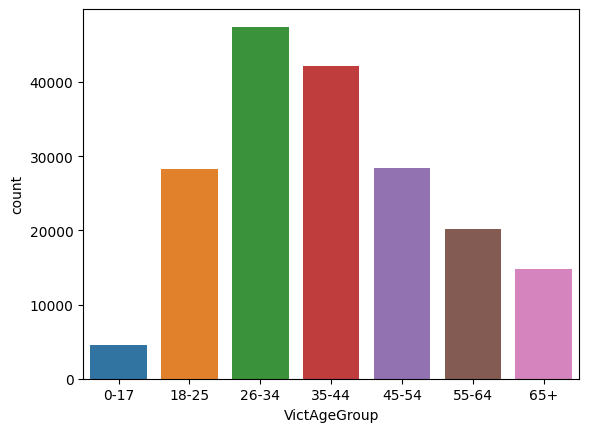

In [15]:
victim_ages = crimes["VictAgeGroup"].value_counts()
print(victim_ages[:7])
sns.countplot(data=crimes, x="VictAgeGroup", hue="VictAgeGroup")

In [18]:
print(f"Age group with the highest crime frequency in LA during this time period: {victim_ages.index[0]}")

Age group with the highest crime frequency in LA during this time period: 26-34
